In [1]:
#    GNU LESSER GENERAL PUBLIC LICENSE
#    Version 3, 29 June 2007
#    Copyright (C) 2007 Free Software Foundation, Inc. <http://fsf.org/>
#    Everyone is permitted to copy and distribute verbatim copies
#    of this license document, but changing it is not allowed.

#    James Gaboardi, 2016

# Automating Multiple Single-Objective Spatial Optimization Models for Efficiency and Reproducibility

----

----

## James D. Gaboardi &nbsp;&nbsp; |  &nbsp;&nbsp; Association of American Geographers  2016

----

----

## Florida State University  &nbsp;&nbsp; |  &nbsp;&nbsp; Department of Geography 

---

# Outline

- Background & Information


- Models
    - PMP
    - PCP
    - CentDian
    - PMCP Method


- Data & Processing


- Solutions


- Visualizations


- Future Work
    - COIN-OR

----------

### Set Path

In [2]:
import IPython.display as IPd

# Local path on user's machine
path = '/Users/jgaboardi/AAG_16/Data/'

# Background & Information

$\Rightarrow$ Automating solutions for *p*-median and *p*-center problems with *p*={*n*(*p*)} facilities

$\Rightarrow$ Compare coverage and costs numerically and visually 

# `PySAL 1.11.0`  
### Python Spatial Analysis Library
[https://www.pysal.readthedocs.org]

Sergio Rey at Arizona State University leads the PySAL project. [https://geoplan.asu.edu/people/sergio-j-rey]

"PySAL is an open source library of spatial analysis functions written in Python intended to support the development of high level applications. PySAL is open source under the BSD License." [https://pysal.readthedocs.org/en/latest/]

I will be only be demonstrating a portion of the functionality in `PySAL.Network`, but there are many other classes and functions for statistical spatial analysis within PySAL.  

# `PySAL.Network`

`PySAL.Network` was principally developed by Jay Laura at Arizona State Universty and the United States Geological Suvery.  [https://geoplan.asu.edu/people/jay-laura]

# `Gurobi 6.5.0`

Relatively new company founded by optimization experts formerly at key positions with CPLEX.
[http://www.gurobi.com] [http://www.gurobi.com/company/about-gurobi]

# `gurobipy`

Python wrapper for Gurobi

# `NumPy 1.10.4`

"NumPy is the fundamental package for scientific computing with Python." [http://www.numpy.org]

# `Shapely 1.5.13`

"Python package for manipulation and analysis of geometric objects in the Cartesian plane." [https://github.com/Toblerity/Shapely]

# `GeoPandas 0.1.1`

"GeoPandas is an open source project to make working with geospatial data in python easier." [http://geopandas.org]

# `Pandas 0.17.1`

"*pandas* is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools..." [http://pandas.pydata.org]

# `Bokeh 0.11.1`

"Bokeh is a Python interactive visualization library that targets modern web browsers for presentation." [http://bokeh.pydata.org/en/latest/]

-------------

# Models

## The *p*-Median Problem

The objective of the *p*-median problem, also know as the minimsum problem and the PMP, is to minimize the total weighted cost while siting [*p*] facilities to serve all demand/client nodes.  It was originally proposed by Hakimi (1964) and is well-studied in Geography, Operations Research, Mathematics, etc.  In this particular project the network-based vertice PMP is used meaning the cost will be calculated on a road network and solutions will be determined based on discrete locations.  Cost is generally defined as either travel time or distance and it is the latter in the project.  Population (demand) utilized as a weight at each client node.  The average cost can be calculated by dividing the minimized total cost by the total demand.

For more information refer to references section.

## Minimize

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\displaystyle {Z} = {\sum_{i \in 1}^n\sum_{j\in 1}^m a_i c_{ij} x_{ij}}$

## Subject to

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\displaystyle\sum_{j\in m} x_{ij}  = 1 ,$&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  $\forall i \in n$

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\displaystyle\sum_{j \in m} y_j = p$

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $x_{ij} - y_j \geq 0,$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\forall i \in n, j \in m$

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $x_{ij}, y_j \in \{0,1\}$ &nbsp;&nbsp; $\forall i \in n , j \in m$

## where

## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$i$ = a specific origin
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$j$ = a specific destination
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$n$ = the set of origins
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$m$ = the set of destinations
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$a_i$ = weight at each node
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$c_{ij}$ = travel costs between nodes
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$x_{ij}$ = the decision variable at each node in the matrix
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$y_j$ = nodes chosen as service facilities
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$p$ = the number of facilities to be sited

-----

Adapted from:
- ***Daskin, M. S. 1995***. Network and Discrete Location: Models, Algorithms, and Applications. Hoboken, NJ, USA: John Wiley & Sons, Inc.

---

## The *p*-Center Problem

The objective of the *p*-center problem, also know as the minimax problem and the PCP, is to 
minimize the worst case cost (*W*) scenario while siting [*p*] facilities to serve all demand/client nodes.  It was originally proposed by Minieka (1970) and, like the PMP, is well-studied in Geography, Operations Research, Mathematics, etc.  In this particular project the network-based vertice PCP is used meaning the cost will be calculated on a road network and solutions will be determined based on discrete locations.  Cost is generally defined as either travel time or distance and it is the latter in the project.

For more information refer to references section.

## Minimize

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $W$

## Subject to

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\displaystyle\sum_{j\in m} x_{ij} = 1,$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   $\forall i \in n$

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\displaystyle\sum_{j \in m} y_j = p$

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $x_{ij} - y_j \geq 0,$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  $\forall i\in n, j \in m$

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\displaystyle W \geq \sum_{j \in m} c_{ij} x_{ij}$&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\forall i \in n$

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $x_{ij}, y_j \in \{0,1\}$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\forall i \in n, j \in m$

## where

## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$W$ = the worst case cost between a client and a service node
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$i$ = a specific origin
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$j$ = a specific destination
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$n$ = the set of origins
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$m$ = the set of destinations
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$a_i$ = weight at each node
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$c_{ij}$ = travel costs between nodes
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$x_{ij}$ = the decision variable at each node in the matrix
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$y_j$ = nodes chosen as service facilities
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$p$ = the number of facilities to be sited

-----

Adapted from:
- ***Daskin, M. S. 1995***. Network and Discrete Location: Models, Algorithms, and Applications. Hoboken, NJ, USA: John Wiley & Sons, Inc.

----

## The *p*-CentDian Problem

The *p*-CentDian Problem was first descibed by Halpern (1976).  It is a combination of the *p*-median problem and the *p*-center problem with a dual objective of minimizing both the worst case scenario and the total travel distance. The objective used for the model in this demonstration is the average of (1) the *p*-center objective function and (2) the *p*-median objective function divided by the total demand.  An alternative formulation is the *p*-$\lambda$-CentDian Problem, where ( $\lambda$ ) represents the weight attributed to the *p*-center objective function and (1 - $\lambda$) represents the weight attributed to the *p*-median objective function which was was proposed by Pérez-Brito, et al (1997). 

For more information refer to references section.

## Minimize


# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $ \displaystyle {W + {Z \over \sum_{i=1}a_i} \over 2}$


## Subject to

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\displaystyle\sum_{j\in m} x_{ij} = 1,$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   $\forall i \in n$

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\displaystyle\sum_{j \in m} y_j = p$

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $x_{ij} - y_j \geq 0,$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  $\forall i\in n, j \in m$

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\displaystyle W \geq \sum_{j \in m} c_{ij} x_{ij}$&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\forall i \in n$

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $x_{ij}, y_j \in \{0,1\}$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\forall i \in n, j \in m$

## where

## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$W$ = the maximum travel cost between client and service nodes

## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$Z$ = the minimized total travel cost $\big({\sum_{i \in 1}^n\sum_{j\in 1}^m a_i c_{ij} x_{ij}}\big)$

## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$i$ = a specific origin
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$j$ = a specific destination
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$n$ = the set of origins
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$m$ = the set of destinations
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$a_i$ = weight at each node
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$c_{ij}$ = travel costs between nodes
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$x_{ij}$ = the decision variable at each node in the matrix
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$y_j$ = nodes chosen as service facilities
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;−	$p$ = the number of facilities to be sited

-----

Adapted from:

- ***Halpern, J. 1976***. The Location of a Center-Median Convex Combination on an Undirected Tree*. Journal of Regional Science 16 (2):237–245

----

## The PMCP Method

### $\Rightarrow$ solve the *p*-median problem and the *p*-center problem concurrently to determine whether optimal locations can be sited with equivalent [*p*]

### $\Rightarrow$ "poor man's" *p*-CentDian Problem?

- automated & efficient decision making for those who don't have access to multiple-objective capable solvers


- ***what it is***:
    - a comparision to determine equivalent site selection of single objective solutions
    - probably best used with low cost sites
    - a opportunity for finding optimal solutions without sacrificing either efficiency or equity
 
 
- ***what it is not***:
    - an optimization solution with multiple objective functions
    - capable of a true 'best solution' trade-off between efficiency and equity
    - guaranteed to find identical solutions

### Workflow

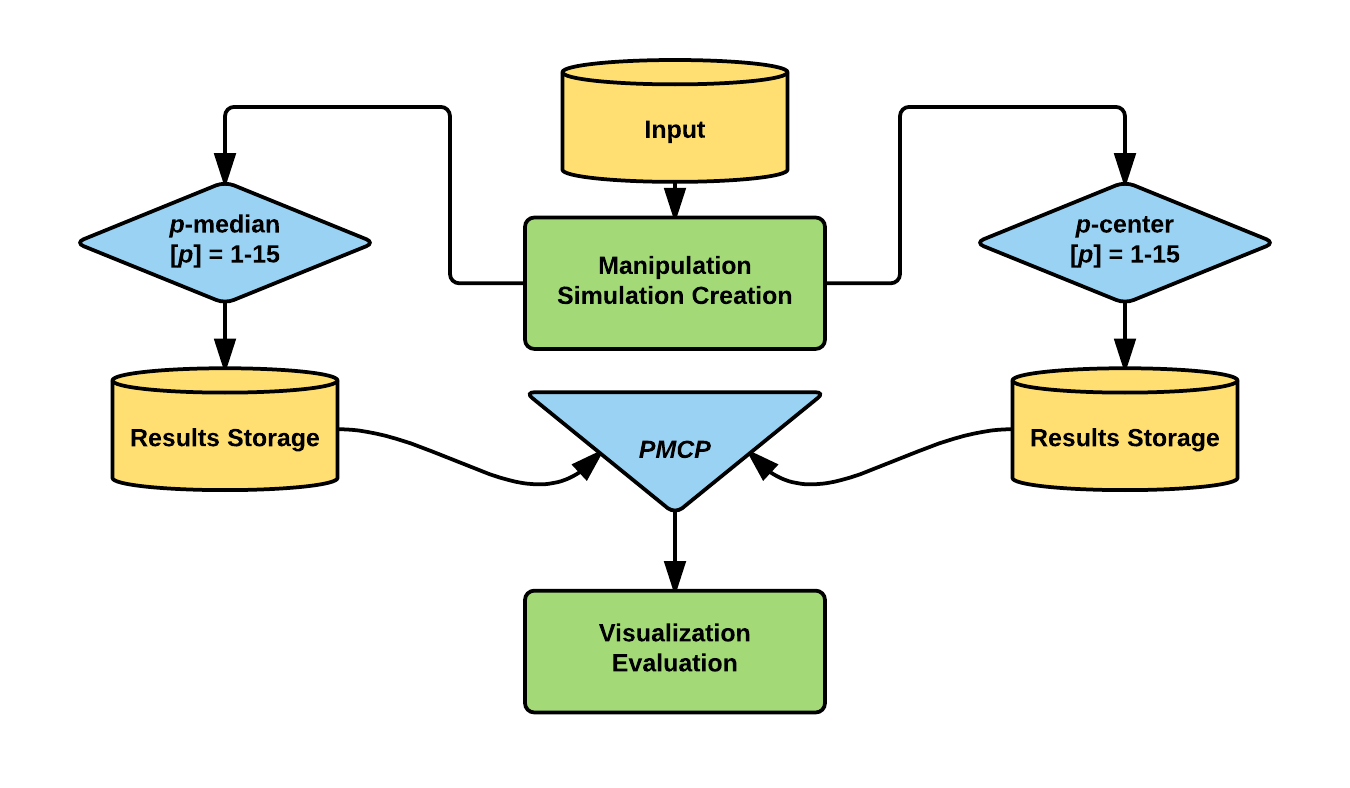

In [3]:
# Conceptual Model Workflow
workflow = IPd.Image(path+'/AAG_16.png')
workflow

----

# Data & Processing

### Process Imports

In [4]:
import pysal as ps
import geopandas as gpd
import numpy as np
import networkx as nx
import shapefile as shp
from shapely.geometry import Point
import shapely
from collections import OrderedDict
import pandas as pd
import qgrid
qgrid.nbinstall(overwrite=True)  # copies javascript dependencies to your /nbextensions folder
qgrid.set_defaults(remote_js=True)#, show_toolbar=True )
import gurobipy as gbp
import time
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.io import output_notebook
from bokeh.models import (HoverTool, BoxAnnotation, GeoJSONDataSource, 
                          GMapPlot, GMapOptions, ColumnDataSource, Circle, 
                          DataRange1d, PanTool, WheelZoomTool, BoxSelectTool)
import utm
from cylp.cy import CyCbcModel, CyClpSimplex
%pylab inline

figsize(15,15)

/Users/jgaboardi/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')

Populating the interactive namespace from numpy and matplotlib


pylab import has clobbered these variables: ['Circle', 'figure', 'show']
`%matplotlib` prevents importing * from pylab and numpy


### Define the function to calculate the cost matrix and convert to miles

In [5]:
def c_s_matrix():  # Define Client to Service Matrix Function
    global All_Dist_MILES # in meters
    All_Neigh_Dist = ntw.allneighbordistances(
                        sourcepattern=ntw.pointpatterns['Rand_Points_CLIENT'],
                        destpattern=ntw.pointpatterns['Rand_Points_SERVICE'])
    All_Dist_MILES = All_Neigh_Dist * 0.000621371 # to miles

### Define the function to solve the *p*-Median + *p*-Center Problems concurrently

In [6]:
def Gurobi_PMCP(sites, Ai, AiSum, All_Dist_Miles):
    
    # Define Global Variables
    global pydf_M
    global selected_M
    global NEW_Records_PMP
    global VAL_PMP
    global AVG_PMP
    
    global pydf_C
    global selected_C
    global NEW_Records_PCP
    global VAL_PCP
    
    global pydf_CentDian
    global selected_CentDian
    global NEW_Records_Pcentdian
    global VAL_CentDian
    
    global pydf_MC
    global VAL_PMCP
    global p_dens
        
    for p in range(1, sites+1):

        # DATA
        # [p]        --> sites
        # Demand     --> Ai
        # Demand Sum --> AiSum
        # Travel Costs
        Cij = All_Dist_MILES
        # Weighted Costs
        Sij = Ai * Cij
        # Total Client and Service nodes
        client_nodes = range(len(Sij))
        service_nodes = range(len(Sij[0]))

        ##################################################################
        # PMP
        t1_PMP = time.time()
        
        #     Create Model, Add Variables, & Update Model
        # Instantiate Model
        mPMP = gbp.Model(' -- p-Median -- ')
        # Turn off Gurobi's output
        mPMP.setParam('OutputFlag',False)

        # Add Client Decision Variables (iXj)
        client_var = []
        for orig in client_nodes:
            client_var.append([])
            for dest in service_nodes:
                client_var[orig].append(mPMP.addVar(vtype=gbp.GRB.BINARY,
                                                lb=0,
                                                ub=1,
                                                obj=Sij[orig][dest], 
                                                name='x'+str(orig+1)+'_'+str(dest+1)))

        # Add Service Decision Variables (j)
        serv_var = []
        for dest in service_nodes:
            serv_var.append([])
            serv_var[dest].append(mPMP.addVar(vtype=gbp.GRB.BINARY,
                                          lb=0,
                                          ub=1,
                                          name='y'+str(dest+1)))

        # Update the model
        mPMP.update()

        #     3. Set Objective Function
        mPMP.setObjective(gbp.quicksum(Sij[orig][dest]*client_var[orig][dest] 
                            for orig in client_nodes for dest in service_nodes), 
                            gbp.GRB.MINIMIZE)


        #     4. Add Constraints
        # Assignment Constraints
        for orig in client_nodes:
            mPMP.addConstr(gbp.quicksum(client_var[orig][dest] 
                            for dest in service_nodes) == 1)
        # Opening Constraints
        for orig in service_nodes:
            for dest in client_nodes:
                mPMP.addConstr((serv_var[orig][0] - client_var[dest][orig] >= 0))

        # Facility Constraint
        mPMP.addConstr(gbp.quicksum(serv_var[dest][0] for dest in service_nodes) == p)

        #     5. Optimize and Print Results
        # Solve
        mPMP.optimize()

        # Write LP
        mPMP.write(path+'LP_Files/PMP'+str(p)+'.lp')
        t2_PMP = time.time()-t1_PMP

        # Record and Display Results
        print '\n*************************************************************************'
        selected_M = OrderedDict()
        dbf1 = ps.open(path+'Snapped/SERVICE_Snapped.dbf')
        NEW_Records_PMP = []
        for v in mPMP.getVars():
            if 'x' in v.VarName:
                pass
            elif v.x > 0:
                var = '%s' % v.VarName
                selected_M[var]=(u"\u2588")
                for i in range(dbf1.n_records):
                    if var in dbf1.read_record(i):
                        x = dbf1.read_record(i)
                        NEW_Records_PMP.append(x)
                    else:
                        pass
                print '    |                                            ', var
            
        pydf_M = pydf_M.append(selected_M, ignore_index=True)
        
        # Instantiate Shapefile
        SHP_Median = shp.Writer(shp.POINT)
        # Add Points
        for idy,idx,x,y in NEW_Records_PMP:
            SHP_Median.point(float(x), float(y))
        # Add Fields
        SHP_Median.field('y_ID')
        SHP_Median.field('x_ID')
        SHP_Median.field('LAT')
        SHP_Median.field('LON')
        # Add Records
        for idy,idx,x,y in NEW_Records_PMP:
            SHP_Median.record(idy,idx,x,y)
        # Save Shapefile
        SHP_Median.save(path+'Results/Selected_Locations_Pmedian'+str(p)+'.shp')   

        print '    | Selected Facility Locations --------------  ^^^^ '
        print '    | Candidate Facilities [p] ----------------- ', len(selected_M)
        val_m = mPMP.objVal
        VAL_PMP.append(round(val_m, 3))
        print '    | Objective Value (miles) ------------------ ', val_m
        avg_m = float(mPMP.objVal)/float(AiSum)
        AVG_PMP.append(round(avg_m, 3))
        print '    | Avg. Value / Client (miles) -------------- ', avg_m
        print '    | Real Time to Optimize (sec.) ------------- ', t2_PMP
        print '*************************************************************************'
        print ' -- The p-Median Problem -- '
        print ' [p] = ', str(p), '\n\n'
        
        
        ##################################################################
        # PCP
        t1_PCP = time.time()
        
        # Instantiate P-Center Model
        mPCP = gbp.Model(' -- p-Center -- ')
        
        # Add Client Decision Variables (iXj)
        client_var_PCP = []
        for orig in client_nodes:
            client_var_PCP.append([])
            for dest in service_nodes:
                client_var_PCP[orig].append(mPCP.addVar(vtype=gbp.GRB.BINARY,
                                                lb=0,
                                                ub=1,
                                                obj=Cij[orig][dest], 
                                                name='x'+str(orig+1)+'_'+str(dest+1)))

        # Add Service Decision Variables (j)
        serv_var_PCP = []
        for dest in service_nodes:
            serv_var_PCP.append([])
            serv_var_PCP[dest].append(mPCP.addVar(vtype=gbp.GRB.BINARY,
                                          lb=0,
                                          ub=1,
                                          name='y'+str(dest+1)))

        # Add the Maximum travel cost variable
        W = mPCP.addVar(vtype=gbp.GRB.CONTINUOUS,
                    lb=0.,
                    name='W') 
        
        # Update the model
        mPCP.update()

        #     3. Set Objective Function
        mPCP.setObjective(W, gbp.GRB.MINIMIZE)

        #     4. Add Constraints
        # Assignment Constraints
        for orig in client_nodes:
            mPCP.addConstr(gbp.quicksum(client_var_PCP[orig][dest] 
                            for dest in service_nodes) == 1)
        # Opening Constraints
        for orig in service_nodes:
            for dest in client_nodes:
                mPCP.addConstr((serv_var_PCP[orig][0] - client_var_PCP[dest][orig] >= 0))

        # Add Maximum travel cost constraints
        for orig in client_nodes:
            mPCP.addConstr(gbp.quicksum(Cij[orig][dest]*client_var_PCP[orig][dest]
                                for dest in service_nodes) - W <= 0)
        
        # Facility Constraint
        mPCP.addConstr(gbp.quicksum(serv_var_PCP[dest][0] for dest in service_nodes) == p)

        #     5. Optimize and Print Results
        # Solve
        mPCP.optimize()

        # Write LP
        mPCP.write(path+'LP_Files/PCP'+str(p)+'.lp')
        t2_PCP = time.time()-t1_PCP

        # Record and Display Results
        print '\n*************************************************************************'
        selected_C = OrderedDict()
        dbf1 = ps.open(path+'Snapped/SERVICE_Snapped.dbf')
        NEW_Records_PCP = []
        for v in mPCP.getVars():
            if 'x' in v.VarName:
                pass
            elif 'W' in v.VarName:
                pass
            elif v.x > 0:
                var = '%s' % v.VarName
                selected_C[var]=(u"\u2588")
                for i in range(dbf1.n_records):
                    if var in dbf1.read_record(i):
                        x = dbf1.read_record(i)
                        NEW_Records_PCP.append(x)
                    else:
                        pass
                print '    |                                            ', var,  '         '
        pydf_C = pydf_C.append(selected_C, ignore_index=True)
        
        # Instantiate Shapefile
        SHP_Center = shp.Writer(shp.POINT)
        # Add Points
        for idy,idx,x,y in NEW_Records_PCP:
            SHP_Center.point(float(x), float(y))
        # Add Fields
        SHP_Center.field('y_ID')
        SHP_Center.field('x_ID')
        SHP_Center.field('LAT')
        SHP_Center.field('LON')
        # Add Records
        for idy,idx,x,y in NEW_Records_PCP:
            SHP_Center.record(idy,idx,x,y)
        # Save Shapefile
        SHP_Center.save(path+'Results/Selected_Locations_Pcenter'+str(p)+'.shp')   

        print '    | Selected Facility Locations --------------  ^^^^ '
        print '    | Candidate Facilities [p] ----------------- ', len(selected_C)
        val_c = mPCP.objVal
        VAL_PCP.append(round(val_c, 3))
        print '    | Objective Value (miles) ------------------ ', val_c
        print '    | Real Time to Optimize (sec.) ------------- ', t2_PCP
        print '*************************************************************************'
        print ' -- The p-Center Problem -- '
        print ' [p] = ', str(p), '\n\n'

        ###########################################################################
        # p-CentDian
        
        t1_centdian = time.time()
        
        # Instantiate P-Center Model
        mPcentdian = gbp.Model(' -- p-CentDian -- ')
        
        # Add Client Decision Variables (iXj)
        client_var_CentDian = []
        for orig in client_nodes:
            client_var_CentDian.append([])
            for dest in service_nodes:
                client_var_CentDian[orig].append(mPcentdian.addVar(vtype=gbp.GRB.BINARY,
                                                lb=0,
                                                ub=1,
                                                obj=Cij[orig][dest], 
                                                name='x'+str(orig+1)+'_'+str(dest+1)))

        # Add Service Decision Variables (j)
        serv_var_CentDian = []
        for dest in service_nodes:
            serv_var_CentDian.append([])
            serv_var_CentDian[dest].append(mPcentdian.addVar(vtype=gbp.GRB.BINARY,
                                          lb=0,
                                          ub=1,
                                          name='y'+str(dest+1)))

        # Add the Maximum travel cost variable
        W_CD = mPcentdian.addVar(vtype=gbp.GRB.CONTINUOUS,
                    lb=0.,
                    name='W') 
        
        # Update the model
        mPcentdian.update()

        #     3. Set Objective Function
        M = gbp.quicksum(Sij[orig][dest]*client_var_CentDian[orig][dest] 
                    for orig in client_nodes for dest in service_nodes)
        
        Zt = M/AiSum
        
        mPcentdian.setObjective((W_CD + Zt) / 2, gbp.GRB.MINIMIZE)

        #     4. Add Constraints
        # Assignment Constraints
        for orig in client_nodes:
            mPcentdian.addConstr(gbp.quicksum(client_var_CentDian[orig][dest] 
                            for dest in service_nodes) == 1)
        # Opening Constraints
        for orig in service_nodes:
            for dest in client_nodes:
                mPcentdian.addConstr((serv_var_CentDian[orig][0] - client_var_CentDian[dest][orig] 
                                      >= 0))

        # Add Maximum travel cost constraints
        for orig in client_nodes:
            mPcentdian.addConstr(gbp.quicksum(Cij[orig][dest]*client_var_CentDian[orig][dest]
                                for dest in service_nodes) - W_CD <= 0)
        
        # Facility Constraint
        mPcentdian.addConstr(gbp.quicksum(serv_var_CentDian[dest][0] for dest in service_nodes) 
                             == p)

        #     5. Optimize and Print Results
        # Solve
        mPcentdian.optimize()

        # Write LP
        mPcentdian.write(path+'LP_Files/CentDian'+str(p)+'.lp')
        t2_centdian = time.time()-t1_centdian

        # Record and Display Results
        print '\n*************************************************************************'
        selected_CentDian = OrderedDict()
        dbf1 = ps.open(path+'Snapped/SERVICE_Snapped.dbf')
        NEW_Records_Pcentdian = []
        for v in mPcentdian.getVars():
            if 'x' in v.VarName:
                pass
            elif 'W' in v.VarName:
                pass
            elif v.x > 0:
                var = '%s' % v.VarName
                selected_CentDian[var]=(u"\u2588")
                for i in range(dbf1.n_records):
                    if var in dbf1.read_record(i):
                        x = dbf1.read_record(i)
                        NEW_Records_Pcentdian.append(x)
                    else:
                        pass
                print '    |                                            ', var,  '         '
        pydf_CentDian = pydf_CentDian.append(selected_CentDian, ignore_index=True)
        
        # Instantiate Shapefile
        SHP_CentDian = shp.Writer(shp.POINT)
        # Add Points
        for idy,idx,x,y in NEW_Records_Pcentdian:
            SHP_CentDian.point(float(x), float(y))
        # Add Fields
        SHP_CentDian.field('y_ID')
        SHP_CentDian.field('x_ID')
        SHP_CentDian.field('LAT')
        SHP_CentDian.field('LON')
        # Add Records
        for idy,idx,x,y in NEW_Records_Pcentdian:
            SHP_CentDian.record(idy,idx,x,y)
        # Save Shapefile
        SHP_CentDian.save(path+'Results/Selected_Locations_CentDian'+str(p)+'.shp')   

        print '    | Selected Facility Locations --------------  ^^^^ '
        print '    | Candidate Facilities [p] ----------------- ', len(selected_CentDian)
        val_cd = mPcentdian.objVal
        VAL_CentDian.append(round(val_cd, 3))
        print '    | Objective Value (miles) ------------------ ', val_cd
        print '    | Real Time to Optimize (sec.) ------------- ', t2_centdian
        print '*************************************************************************'
        print ' -- The p-CentDian Problem -- '
        print ' [p] = ', str(p), '\n\n'
        
        ###########################################################################
        # p-Median + p-Center Method
        
        # Record solutions that record identical facility selection
        if selected_M.keys() == selected_C.keys() == selected_CentDian.keys():
            
            pydf_MC = pydf_MC.append(selected_C, ignore_index=True) # append PMCP dataframe
            p_dens.append('p='+str(p)) # density of [p] 
            VAL_PMCP.append([round(val_m,3), round(avg_m,3), 
                             round(val_c,3), round(val_cd,3)]) # append PMCP list
            
            # Instantiate Shapefile
            SHP_PMCP = shp.Writer(shp.POINT)
            # Add Points
            for idy,idx,x,y in NEW_Records_PCP:
                SHP_PMCP.point(float(x), float(y))
            # Add Fields
            SHP_PMCP.field('y_ID')
            SHP_PMCP.field('x_ID')
            SHP_PMCP.field('LAT')
            SHP_PMCP.field('LON')
            # Add Records
            for idy,idx,x,y in NEW_Records_PCP:
                SHP_PMCP.record(idy,idx,x,y)
            # Save Shapefile
            SHP_PMCP.save(path+'Results/Selected_Locations_PMCP'+str(p)+'.shp')
        else:
            pass      

### Reproject the street network with `GeoPandas`

In [7]:
STREETS_Orig = gpd.read_file(path+'Waverly_Trim/Waverly.shp')
STREETS = gpd.read_file(path+'Waverly_Trim/Waverly.shp')
STREETS.to_crs(epsg=2779, inplace=True) # NAD83(HARN) / Florida North
STREETS.to_file(path+'WAVERLY/WAVERLY.shp')
STREETS[:5]

,FULLNAME,LINEARID,MTFCC,RTTYP,geometry
0,N Ride,110158908901,S1400,M,LINESTRING (621388.7127543514 163519.180833002...
1,N Ride,110158908902,S1400,M,LINESTRING (621970.5489300904 163446.280840687...
2,S Ride,110158908913,S1400,M,LINESTRING (621390.8512775075 163260.113274841...
3,Walton Dr,110158976711,S1400,M,LINESTRING (623030.6549003529 165573.807212860...
4,Fontaine Dr,110159019423,S1400,M,LINESTRING (623368.1251134621 165788.033358145...


### Instantiate Network and read in `WAVERLY.shp`

In [8]:
ntw = ps.Network(path+'WAVERLY/WAVERLY.shp')
shp_W = ps.open(path+'WAVERLY/WAVERLY.shp')

### Create Buffer of 200 meters

In [9]:
buff = STREETS.buffer(200)  #Buffer
buff[:5]

0    POLYGON ((621465.3167118202 163719.7320321212,...
1    POLYGON ((622011.323892185 163231.3835929646, ...
2    POLYGON ((621448.7888749669 163451.5130565979,...
3    POLYGON ((623119.6454389954 165752.7642512885,...
4    POLYGON ((623171.3152202072 165844.5275350949,...
dtype: object

### Plot Buffers of Individual Streets

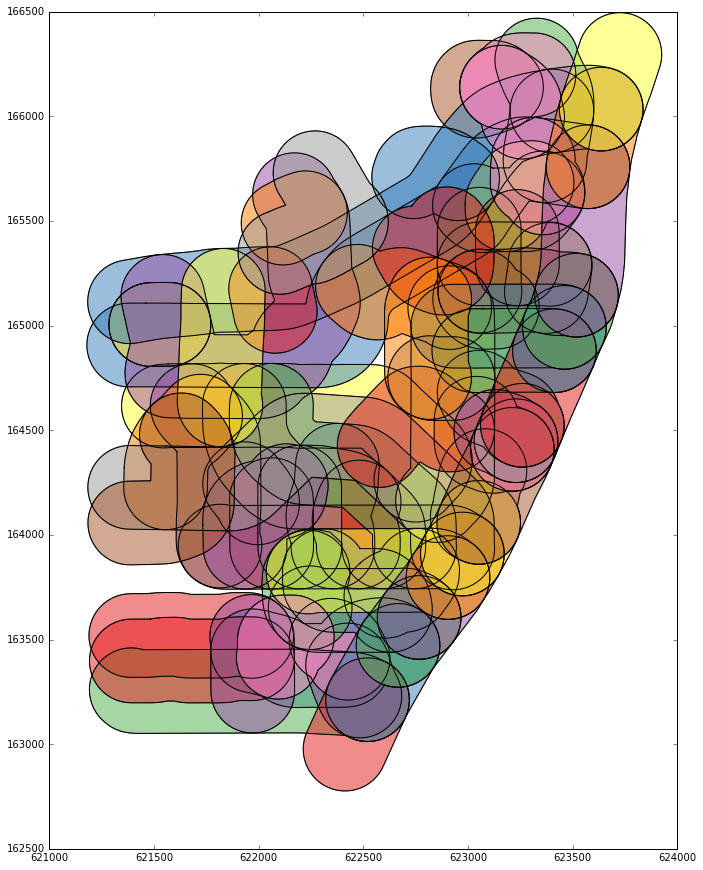

In [10]:
buff.plot()

### Create a Unary Union of the individual street buffers

In [11]:
buffU = buff.unary_union  #Buffer Union
buff1 = gpd.GeoSeries(buffU)
buff1.crs = STREETS.crs
Buff = gpd.GeoDataFrame(buff1, crs=STREETS.crs)
Buff.columns = ['geometry']
Buff

,geometry
0,"POLYGON ((622700.1341171626 163125.4208353004,..."


### Plot the unary union buffer

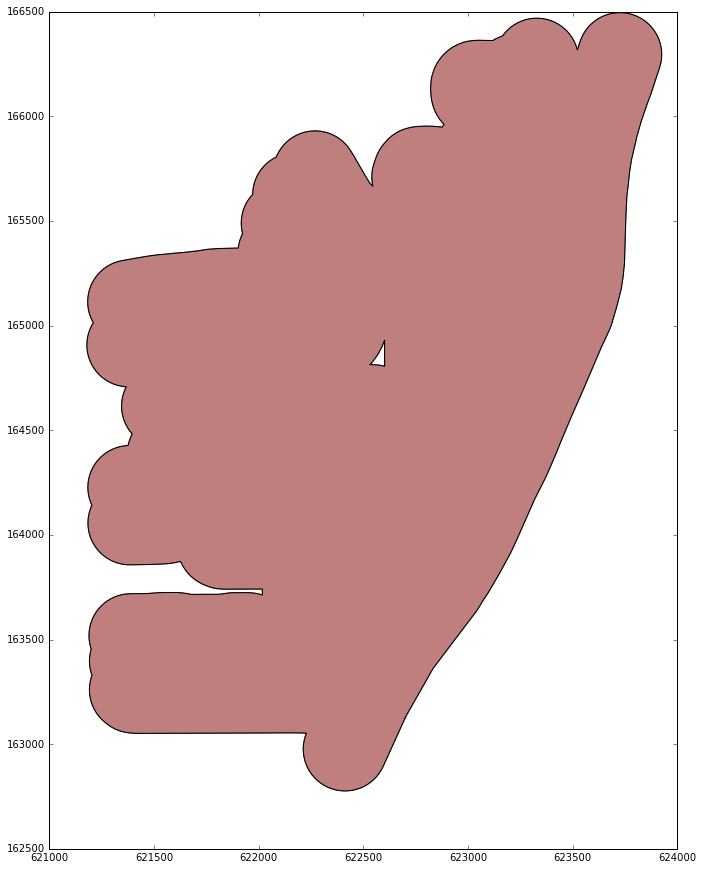

In [12]:
Buff.plot()

### Create 1000 random ppoints within the bounds of `WAVERLY.shp`

In [13]:
np.random.seed(352)
x = np.random.uniform(shp_W.bbox[0], shp_W.bbox[2], 1000)
np.random.seed(850)
y = np.random.uniform(shp_W.bbox[1], shp_W.bbox[3], 1000)  
coords0= zip(x,y)
coords = [shapely.geometry.Point(i) for i in coords0]
Rand = gpd.GeoDataFrame(coords)
Rand.crs = STREETS.crs
Rand.columns = ['geometry']
Rand[:5]

,geometry
0,POINT (623427.8190332755 166275.3062495199)
1,POINT (622697.2031300153 162992.9652048317)
2,POINT (621922.7038578516 164917.050600741)
3,POINT (621615.3609543599 164243.1879802518)
4,POINT (623454.7605480383 163733.8321171276)


### Plot the 1000 random 

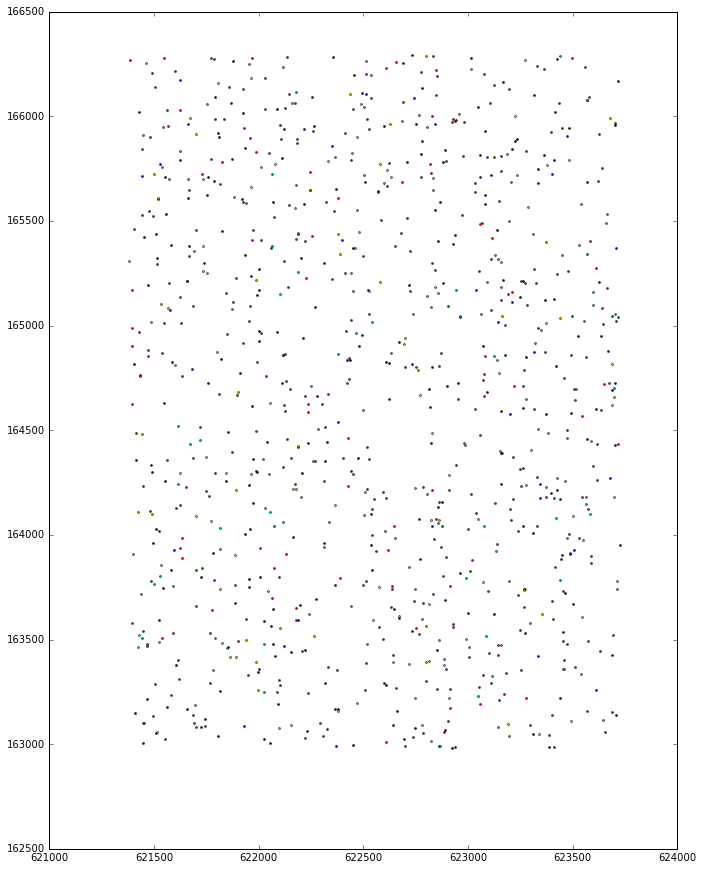

In [14]:
Rand.plot()

### Create `GeoPandas` DF of the random points within the Unary Buffer

In [15]:
Inter = [Buff['geometry'].intersection(p) for p in Rand['geometry']]
INTER = gpd.GeoDataFrame(Inter, crs=STREETS.crs)
INTER.columns = ['geometry']
INTER[:5]

,geometry
0,POINT (623427.8190332755 166275.3062495199)
1,()
2,POINT (621922.7038578516 164917.050600741)
3,POINT (621615.3609543599 164243.1879802518)
4,()


### Plot the points within the Unary Buffer

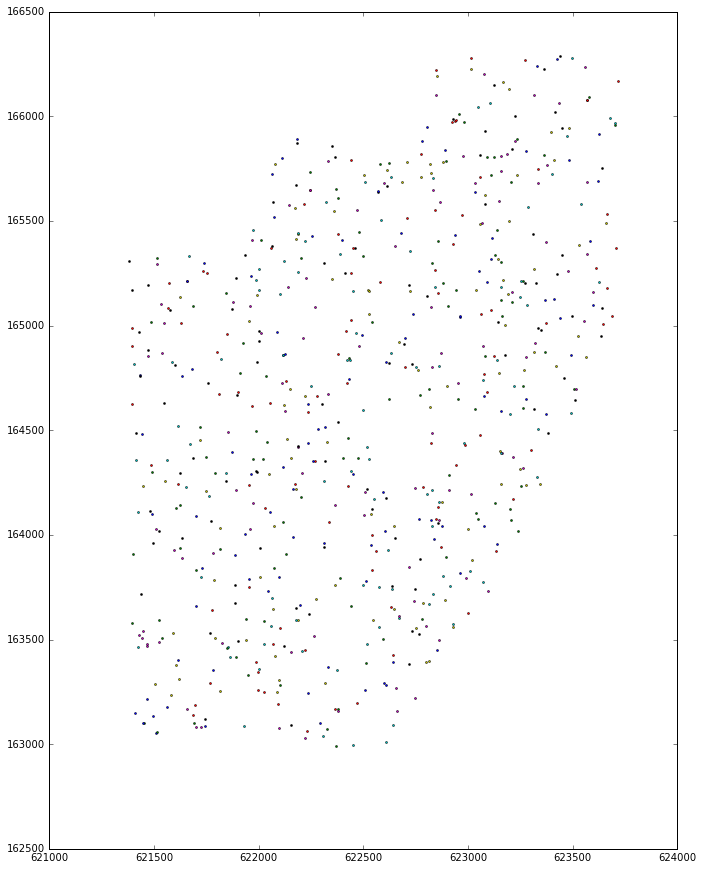

In [16]:
INTER.plot()

### Add only intersecting records to a list 

In [17]:
# Add records that are points within the buffer
point_in = []
for p in INTER['geometry']:
    if type(p) == shapely.geometry.point.Point:
        point_in.append(p)
point_in[:5]

### Keep the first 100 for clients and the last 15 for service facilities

In [18]:
CLIENT = gpd.GeoDataFrame(point_in[:100], crs=STREETS.crs)
CLIENT.columns = ['geometry']
SERVICE = gpd.GeoDataFrame(point_in[-15:], crs=STREETS.crs)
SERVICE.columns = ['geometry']
CLIENT.to_file(path+'CLIENT')
SERVICE.to_file(path+'SERVICE')

In [19]:
CLIENT[:5]

,geometry
0,POINT (623427.8190332755 166275.3062495199)
1,POINT (621922.7038578516 164917.050600741)
2,POINT (621615.3609543599 164243.1879802518)
3,POINT (621862.673209806 163415.9461312958)
4,POINT (621659.2900576409 163168.6459518427)


In [20]:
SERVICE[:5]

,geometry
0,POINT (623558.8536816949 166234.7359778296)
1,POINT (623016.3125997729 166225.5051476926)
2,POINT (621521.47511704 164019.1317467149)
3,POINT (621613.5815189295 163400.6942524033)
4,POINT (623159.364408439 165123.3394007629)


### Plot the Unary Union, Simulated Clients, Simulated Service, and Streets

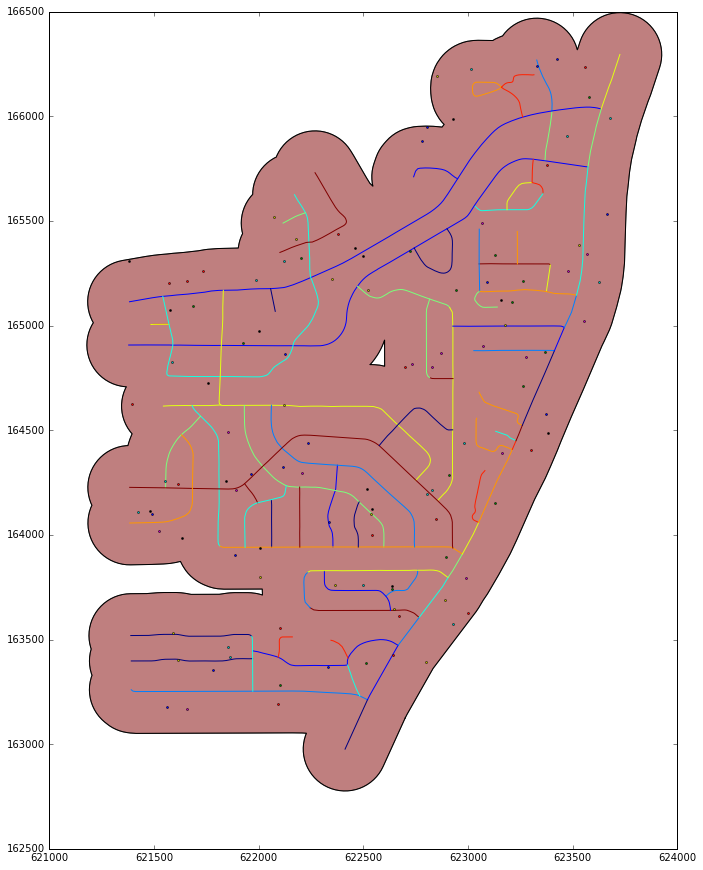

In [21]:
Buff.plot()
STREETS.plot()
CLIENT.plot()
SERVICE.plot(colormap=True)

### Instaniate non-solution graphs to be drawn

In [22]:
g = nx.Graph() # Roads & Nodes
g1 = nx.MultiGraph() # Edges and Vertices
GRAPH_client = nx.Graph() # Clients 
g_client = nx.Graph() # Snapped Clients
GRAPH_service = nx.Graph() # Service
g_service = nx.Graph() # Snapped Service

### Instantiate and fill Client and Service point dictionaries

In [23]:
points_client = {} 
points_service = {}

CLI = ps.open(path+'CLIENT/CLIENT.shp')
for idx, coords in enumerate(CLI):
    GRAPH_client.add_node(idx)
    points_client[idx] = coords
    GRAPH_client.node[idx] = coords
    
SER = ps.open(path+'SERVICE/SERVICE.shp')
for idx, coords in enumerate(SER):
    GRAPH_service.add_node(idx)
    points_service[idx] = coords
    GRAPH_service.node[idx] = coords

### Simulate weights for Client Demand

In [24]:
# Client Weights for demand
np.random.seed(850)
Ai = np.random.randint(1, 5, len(CLI))
Ai = Ai.reshape(len(Ai),1)
AiSum = np.sum(Ai) # Sum of Weights (Total Demand)

### Instantiate Client `.shp`

In [25]:
client = shp.Writer(shp.POINT) # Client Shapefile
# Add Random Points
for i,j in CLI:
    client.point(i,j)
# Add Fields
client.field('client_ID')
client.field('Weight')
counter = 0
for i in range(len(CLI)):
    counter = counter + 1
    client.record('client_' + str(counter), Ai[i])
client.save(path+'Simulated/RandomPoints_CLIENT') # Save Shapefile 

### Instantiate Service `.shp`

In [26]:
service = shp.Writer(shp.POINT) #Service Shapefile
# Add Random Points
for i,j in SER:
    service.point(i,j)
# Add Fields
service.field('y_ID')
service.field('x_ID')
counter = 0
for i in range(len(SER)):
    counter = counter + 1
    service.record('y' + str(counter), 'x' + str(counter))
service.save(path+'Simulated/RandomPoints_SERVICE') # Save Shapefile 

### Snap Client and Service points to the network

In [27]:
# Snap
Snap_C = ntw.snapobservations(path+'Simulated/RandomPoints_CLIENT.shp', 
                     'Rand_Points_CLIENT', attribute=True)
Snap_S = ntw.snapobservations(path+'Simulated/RandomPoints_SERVICE.shp', 
                     'Rand_Points_SERVICE', attribute=True)

### Create lat/lon lists of snapped service coords

In [28]:
# Create Lat & Lon lists of the snapped service locations
y_snapped = []
x_snapped = []
for i,j in ntw.pointpatterns['Rand_Points_SERVICE'].snapped_coordinates.iteritems():
    y_snapped.append(j[0]) 
    x_snapped.append(j[1])

### Instantiate snapped Service `.shp`

In [29]:
service_SNAP = shp.Writer(shp.POINT) # Snapped Service Shapefile
# Add Points
for i,j in ntw.pointpatterns['Rand_Points_SERVICE'].snapped_coordinates.iteritems():
    service_SNAP.point(j[0],j[1])
# Add Fields
service_SNAP.field('y_ID')
service_SNAP.field('x_ID')
service_SNAP.field('LAT')
service_SNAP.field('LON')
counter = 0
for i in range(len(ntw.pointpatterns['Rand_Points_SERVICE'].snapped_coordinates)):
    counter = counter + 1
    service_SNAP.record('y' + str(counter), 'x' + str(counter), y_snapped[i], x_snapped[i])
service_SNAP.save(path+'Snapped/SERVICE_Snapped') # Save Shapefile 

### Call Client to Service Matrix Function

In [30]:
# Call Client to Service Matrix Function
c_s_matrix() 

### Create Lists to fill index and columns of `GeoPandas` Data Frames

In [31]:
# PANDAS DATAFRAME OF p/y results
p_list = []
for i in range(1, len(SER)+1):
    p = 'p='+str(i)
    p_list.append(p)
y_list = []
for i in range(1, len(SER)+1):
    y = 'y'+str(i)
    y_list.append(y)

### Instantiate `GeoPandas` Dataframes

In [32]:
pydf_M = pd.DataFrame(index=p_list,columns=y_list)
pydf_C = pd.DataFrame(index=p_list,columns=y_list)
pydf_CentDian = pd.DataFrame(index=p_list,columns=y_list)
pydf_MC = pd.DataFrame(index=p_list,columns=y_list)

### Create PMP, PCP, and CentDian solution graphs

In [33]:
# p-Median
P_Med_Graphs = OrderedDict()
for x in range(1, len(SER)+1):
    P_Med_Graphs["{0}".format(x)] = nx.Graph()
    
# p-Center
P_Cent_Graphs = OrderedDict()
for x in range(1, len(SER)+1):
    P_Cent_Graphs["{0}".format(x)] = nx.Graph()
    
# p-CentDian
P_CentDian_Graphs = OrderedDict()
for x in range(1, len(SER)+1):
    P_CentDian_Graphs["{0}".format(x)] = nx.Graph()

### Instantiate lists for objective values and average values of all models

In [34]:
# PMP
VAL_PMP = []
AVG_PMP = []

# PCP
VAL_PCP = []

# CentDian
VAL_CentDian = []

# PMCP
VAL_PMCP = []
p_dens = [] # when the facilities for the p-median & p-center are the same

---

# Solutions

### Solve all

In [35]:
Gurobi_PMCP(len(SER), Ai, AiSum, All_Dist_MILES)


*************************************************************************
    |                                             y10
    | Selected Facility Locations --------------  ^^^^ 
    | Candidate Facilities [p] -----------------  1
    | Objective Value (miles) ------------------  252.628622209
    | Avg. Value / Client (miles) --------------  1.01866379923
    | Real Time to Optimize (sec.) -------------  0.235152006149
*************************************************************************
 -- The p-Median Problem -- 
 [p] =  1 


Optimize a model with 1701 rows, 1516 columns and 6115 nonzeros
Coefficient statistics:
  Matrix range    [2e-03, 3e+00]
  Objective range [1e+00, 1e+00]
  Bounds range    [1e+00, 1e+00]
  RHS range       [1e+00, 1e+00]
Presolve removed 1600 rows and 1500 columns
Presolve time: 0.13s
Presolved: 101 rows, 16 columns, 1515 nonzeros
Variable types: 1 continuous, 15 integer (15 binary)
Found heuristic solution: objective 2.8439770
Found heuristic solutio

### Calculate and record percentage decrease

In [36]:
# PMP Total
PMP_Tot_Diff = []
for i in range(len(VAL_PMP)):
    if i == 0:
        PMP_Tot_Diff.append('0%')
    elif i <= len(VAL_PMP):
        n1 = VAL_PMP[i-1]
        n2 = VAL_PMP[i]
        diff = n2 - n1
        perc_change = (diff/n1)*100.
        PMP_Tot_Diff.append(str(round(perc_change, 2))+'%')

# PMP Average
PMP_Avg_Diff = []
for i in range(len(AVG_PMP)):
    if i == 0:
        PMP_Avg_Diff.append('0%')
    elif i <= len(AVG_PMP):
        n1 = AVG_PMP[i-1]
        n2 = AVG_PMP[i]
        diff = n2 - n1
        perc_change = (diff/n1)*100.
        PMP_Avg_Diff.append(str(round(perc_change, 2))+'%')
        
# PCP
PCP_Diff = []
for i in range(len(VAL_PCP)):
    if i == 0:
        PCP_Diff.append('0%')
    elif i <= len(VAL_PCP):
        n1 = VAL_PCP[i-1]
        n2 = VAL_PCP[i]
        diff = n2 - n1
        perc_change = (diff/n1)*100.
        PCP_Diff.append(str(round(perc_change, 2))+'%')

# p-CentDian
CentDian_Diff = []
for i in range(len(VAL_CentDian)):
    if i == 0:
        CentDian_Diff.append('0%')
    elif i <= len(VAL_CentDian):
        n1 = VAL_CentDian[i-1]
        n2 = VAL_CentDian[i]
        diff = n2 - n1
        perc_change = (diff/n1)*100.
        CentDian_Diff.append(str(round(perc_change, 2))+'%')

# PMCP       
PMCP_Diff = []
counter = 0
for i in range(len(VAL_PMCP)):
    PMCP_Diff.append([])
    for j in range(len(VAL_PMCP[0])):
        if i == 0:
            PMCP_Diff[i].append('0%')
        elif i <= len(VAL_PMCP):
            n1 = VAL_PMCP[i-1][j]
            n2 = VAL_PMCP[i][j]
            diff = n2 - n1
            perc_change = (diff/n1*100.)
            PMCP_Diff[i].append(str(round(perc_change, 2))+'%')

### Data Frames adjust

In [37]:
# PMP
pydf_M = pydf_M[len(SER):]
pydf_M.reset_index()
pydf_M.index = p_list
pydf_M.columns.name = 'Decision\nVariables'
pydf_M.index.name = 'Facility\nDensity'
pydf_M['Tot. Obj. Value'] = VAL_PMP
pydf_M['Tot. % Change'] = PMP_Tot_Diff
pydf_M['Avg. Obj. Value'] = AVG_PMP
pydf_M['Avg. % Change'] = PMP_Avg_Diff
pydf_M = pydf_M.fillna('')
#pydf_M.to_csv(path+'CSV')  <-- need to change squares to alphanumeric to use

# PCP
pydf_C = pydf_C[len(SER):]
pydf_C.reset_index()
pydf_C.index = p_list
pydf_C.columns.name = 'Decision\nVariables'
pydf_C.index.name = 'Facility\nDensity'
pydf_C['Worst Case Obj. Value'] = VAL_PCP
pydf_C['Worst Case % Change'] = PCP_Diff
pydf_C = pydf_C.fillna('')
#pydf_C.to_csv(path+'CSV')  <-- need to change squares to alphanumeric to use

pydf_CentDian = pydf_CentDian[len(SER):]
pydf_CentDian.reset_index()
pydf_CentDian.index = p_list
pydf_CentDian.columns.name = 'Decision\nVariables'
pydf_CentDian.index.name = 'Facility\nDensity'
pydf_CentDian['CentDian Obj. Value'] = VAL_CentDian
pydf_CentDian['CentDian % Change'] = CentDian_Diff
pydf_CentDian = pydf_CentDian.fillna('')
#pydf_CentDian.to_csv(path+'CSV')  <-- need to change squares to alphanumeric to use

# PMCP
pydf_MC = pydf_MC[len(SER):]
pydf_MC.reset_index()
pydf_MC.index = p_dens
pydf_MC.columns.name = 'D.V.'
pydf_MC.index.name = 'F.D.'
pydf_MC['Min.\nTotal'] = [VAL_PMCP[x][0] for x in range(len(VAL_PMCP))]
pydf_MC['Min.\nTotal\n%\nChange'] = [PMCP_Diff[x][0] for x in range(len(PMCP_Diff))]
pydf_MC['Avg.\nTotal'] = [VAL_PMCP[x][1] for x in range(len(VAL_PMCP))]
pydf_MC['Avg.\nTotal\n%\nChange'] = [PMCP_Diff[x][1] for x in range(len(PMCP_Diff))]
pydf_MC['Worst\nCase'] = [VAL_PMCP[x][2] for x in range(len(VAL_PMCP))]
pydf_MC['Worst\nCase\n%\nChange'] = [PMCP_Diff[x][2] for x in range(len(PMCP_Diff))]
pydf_MC['Center\nMedian'] = [VAL_PMCP[x][3] for x in range(len(VAL_PMCP))]
pydf_MC['Center\nMedian\n%\nChange'] = [PMCP_Diff[x][3] for x in range(len(PMCP_Diff))]
pydf_MC = pydf_MC.fillna('')
#pydf_MC.to_csv(path+'CSV')  <-- need to change squares to alphanumeric to use

### Create Graphs of the PMCP results

In [38]:
# Create Graphs of the PMCP results
PMCP_Graphs = OrderedDict()
for x in pydf_MC.index:
    PMCP_Graphs[x[2:]] = nx.Graph()

---

# Visualizations

### Draw PMP figure [*p*=1] large $ \rightarrow $ small [*p*=15]

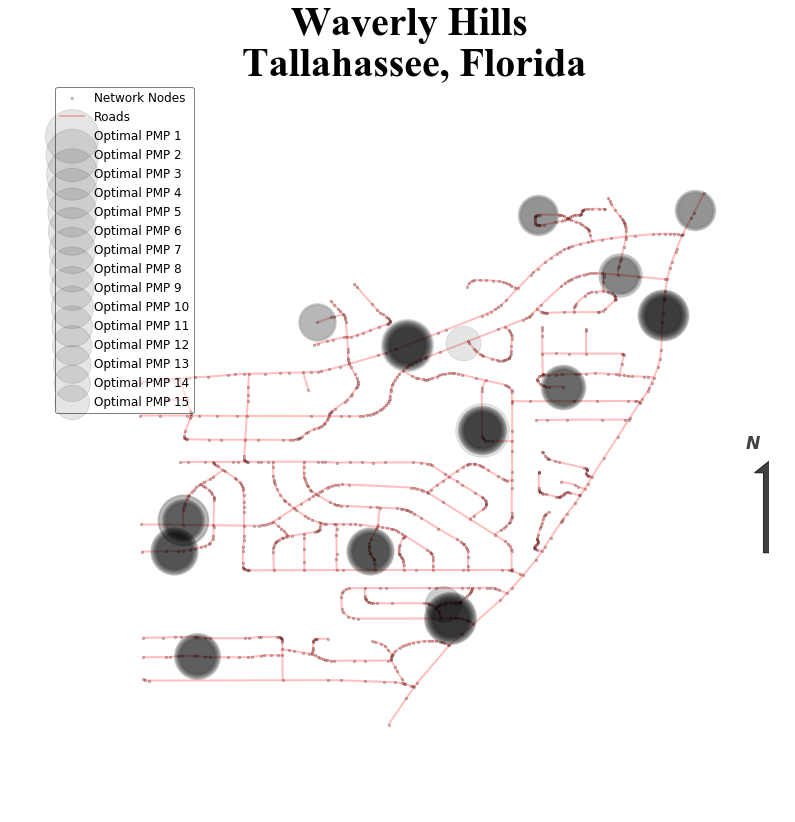

In [39]:
figsize(10,10)

# Draw Network Actual Roads and Nodes
for e in ntw.edges:
    g.add_edge(*e)
nx.draw(g, ntw.node_coords, node_size=5, alpha=0.25, edge_color='r', width=2)

#PMP
size = 3000
for i,j in P_Med_Graphs.iteritems():
    size=size-120
    # p-Median
    P_Med = ps.open(path+'Results/Selected_Locations_Pmedian'+str(i)+'.shp')
    points_median = {}
    for idx, coords in enumerate(P_Med):
        P_Med_Graphs[i].add_node(idx)
        points_median[idx] = coords
        P_Med_Graphs[i].node[idx] = coords
    nx.draw(P_Med_Graphs[i], 
                points_median, 
                node_size=size, 
                alpha=.1, 
                node_color='k')

# Legend (Ordered Dictionary)
LEGEND = OrderedDict()
LEGEND['Network Nodes']=g
LEGEND['Roads']=g
for i in P_Med_Graphs:
    LEGEND['Optimal PMP '+str(i)]=P_Med_Graphs[i]
legend(LEGEND, 
       loc='upper left', 
       fancybox=True, 
       framealpha=0.5, 
       scatterpoints=1)

# Title
title('Waverly Hills\n Tallahassee, Florida', family='Times New Roman', 
      size=40, color='k', backgroundcolor='w', weight='bold')

# North Arrow and 'N' --> Must be changed for different spatial resolutions, etc.
arrow(624000, 164050, 0.0, 500, width=50, head_width=125, 
          head_length=75, fc='k', ec='k',alpha=0.75,)
annotate('N', xy=(623900, 164700), fontstyle='italic', fontsize='xx-large',
            fontweight='heavy', alpha=0.75)

### Pandas PMP Data Frame

In [40]:
qgrid.show_grid(pydf_M, show_toolbar=True)

### Bokeh PMP [*p* vs. cost] trade off

In [41]:
#import bokeh
#from bokeh.charts import Scatter, show
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.io import output_notebook
from bokeh.models import HoverTool, BoxAnnotation
output_notebook()

source_m = ColumnDataSource(
        data=dict(
            x=range(1, len(SER)+1),
            y=AVG_PMP,
            avg=AVG_PMP,
            desc=p_list,
            change=PMP_Avg_Diff))

TOOLS = 'wheel_zoom, pan, reset, crosshair, save'

hover = HoverTool(line_policy="nearest", mode="hline", tooltips="""
        <div>
            <div>
                
            </div>
            <div>
                <span style="font-size: 17px; font-weight: bold;">@desc</span> 
            </div>
            <div>
                <span style="font-size: 15px;">Average Minimized Cost</span>
                <span style="font-size: 15px; font-weight: bold; color: #ff4d4d;">[@avg]</span>
            </div>
            <div>
                <span style="font-size: 15px;">Variation</span>
                <span style="font-size: 15px; font-weight: bold; color: #ff4d4d;">[@change]</span>
            </div>
        </div>""")

# Instantiate Plot
pmp_plot = figure(plot_width=600, plot_height=600, tools=[TOOLS,hover],
           title="Average Distance vs. p-Facilities", y_range=(0,2))

# Create plot points and set source
pmp_plot.circle('x', 'y', size=15, color='red',source=source_m, 
                legend='Total Minimized Cost / Total Demand')
pmp_plot.line('x', 'y', line_width=2, color='red', alpha=.5, source=source_m, 
              legend='Total Minimized Cost / Total Demand')

pmp_plot.xaxis.axis_label = '[p = n]'
pmp_plot.yaxis.axis_label = 'Miles'

one_quarter = BoxAnnotation(plot=pmp_plot, top=.35, 
                            fill_alpha=0.1, fill_color='green')
half = BoxAnnotation(plot=pmp_plot, bottom=.35, top=.7, 
                            fill_alpha=0.1, fill_color='blue')
three_quarter = BoxAnnotation(plot=pmp_plot, bottom=.7, top=1.05,
                            fill_alpha=0.1, fill_color='gray')

pmp_plot.renderers.extend([one_quarter, half, three_quarter])

# Display the figure
show(pmp_plot)

Loading BokehJS ...

### Draw PCP figure [*p*=1] large $ \rightarrow $ small [*p*=15]

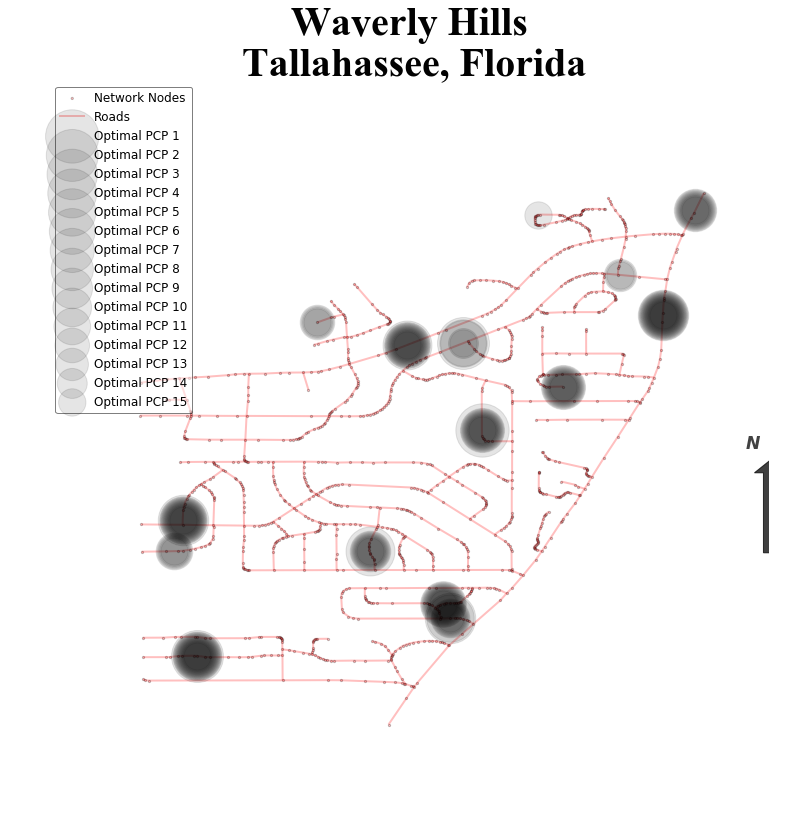

In [42]:
figsize(10,10)
# Draw Network Actual Roads and Nodes
for e in ntw.edges:
    g.add_edge(*e)
nx.draw(g, ntw.node_coords, node_size=5, alpha=0.25, edge_color='r', width=2)

#PCP
size = 3000
for i,j in P_Cent_Graphs.iteritems():
    size=size-150
    # p-Center
    P_Cent = ps.open(path+'Results/Selected_Locations_Pcenter'+str(i)+'.shp')
    points_center = {}
    for idx, coords in enumerate(P_Cent):
        P_Cent_Graphs[i].add_node(idx)
        points_center[idx] = coords
        P_Cent_Graphs[i].node[idx] = coords
    nx.draw(P_Cent_Graphs[i], 
                points_center, 
                node_size=size, 
                alpha=.1, 
                node_color='k')

# Legend (Ordered Dictionary)
LEGEND = OrderedDict()
LEGEND['Network Nodes']=g
LEGEND['Roads']=g
for i in P_Cent_Graphs:
    LEGEND['Optimal PCP '+str(i)]=P_Cent_Graphs[i]
legend(LEGEND, 
       loc='upper left', 
       fancybox=True, 
       framealpha=0.5, 
       scatterpoints=1)

# Title
title('Waverly Hills\n Tallahassee, Florida', family='Times New Roman', 
      size=40, color='k', backgroundcolor='w', weight='bold')

# North Arrow and 'N' --> Must be changed for different spatial resolutions, etc.
arrow(624000, 164050, 0.0, 500, width=50, head_width=125, 
          head_length=75, fc='k', ec='k',alpha=0.75,)
annotate('N', xy=(623900, 164700), fontstyle='italic', fontsize='xx-large',
            fontweight='heavy', alpha=0.75)

### Pandas PCP Data Frame

In [43]:
qgrid.show_grid(pydf_C, show_toolbar=True)

### Bokeh PCP [*p* vs. cost] trade off

In [44]:
#output_notebook()
source_c = ColumnDataSource(
        data=dict(
            x=range(1, len(SER)+1),
            y=VAL_PCP,
            obj=VAL_PCP,
            desc=p_list,
            change=PCP_Diff))
    
TOOLS = 'wheel_zoom, pan, reset, crosshair, save'
    
hover = HoverTool(line_policy="nearest", mode="vline", tooltips="""
        <div>
            <div>
                
            </div>
            <div>
                <span style="font-size: 17px; font-weight: bold;">@desc</span> 
            </div>
            <div>
                <span style="font-size: 15px;">Worst Case Cost</span>
                <span style="font-size: 15px; font-weight: bold; color: #00b300;">[@obj]</span>
            </div>
            <div>
                <span style="font-size: 15px;">Variation</span>
                <span style="font-size: 15px; font-weight: bold; color: #00b300;">[@change]</span>
            </div>
        </div>""")

# Instantiate Plot
pcp_plot = figure(plot_width=600, plot_height=600, tools=[TOOLS,hover],
           title="Worst Case Distance vs. p-Facilities", y_range=(0,2))

# Create plot points and set source
pcp_plot.circle('x', 'y', size=15, color='green', source=source_c,
                   legend='Minimized Worst Case')
pcp_plot.line('x', 'y', line_width=2, color='green', alpha=.5, source=source_c,
                   legend='Minimized Worst Case')

pcp_plot.xaxis.axis_label = '[p = n]'
pcp_plot.yaxis.axis_label = 'Miles'

one_quarter = BoxAnnotation(plot=pcp_plot, top=.35, 
                            fill_alpha=0.1, fill_color='green')
half = BoxAnnotation(plot=pcp_plot, bottom=.35, top=.7, 
                            fill_alpha=0.1, fill_color='blue')
three_quarter = BoxAnnotation(plot=pcp_plot, bottom=.7, top=1.05,
                            fill_alpha=0.1, fill_color='gray')

pcp_plot.renderers.extend([one_quarter, half, three_quarter])

# Display the figure
show(pcp_plot)

---

### Draw CentDian figure [*p*=1] large $ \rightarrow $ small [*p*=15]

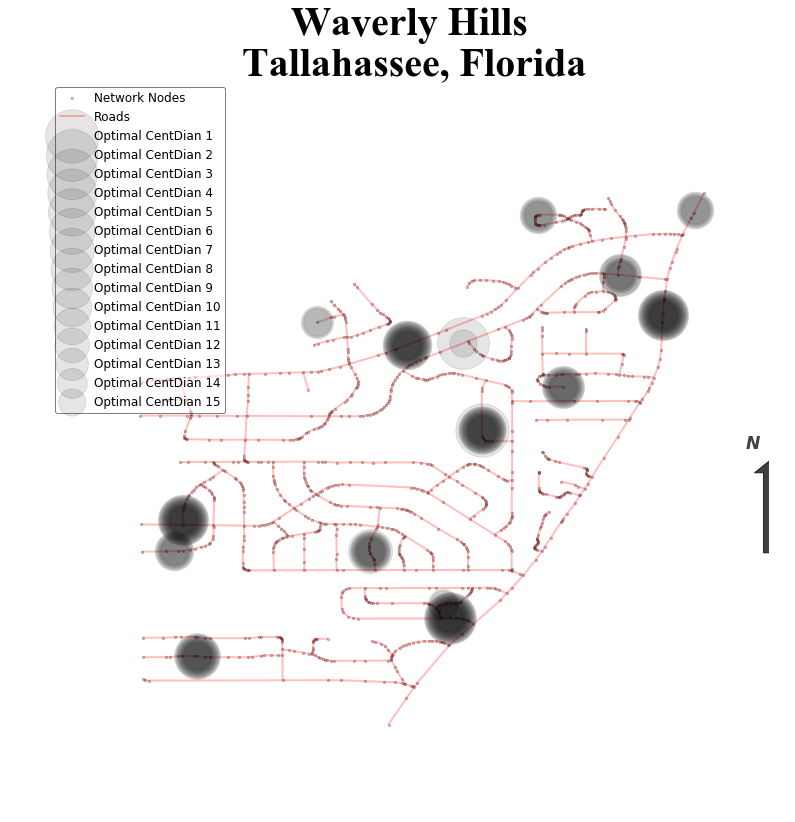

In [45]:
figsize(10,10)
# Draw Network Actual Roads and Nodes
for e in ntw.edges:
    g.add_edge(*e)
nx.draw(g, ntw.node_coords, node_size=5, alpha=0.25, edge_color='r', width=2)

#CentDian
size = 3000
for i,j in P_CentDian_Graphs.iteritems():
    size=size-150
    P_CentDian = ps.open(path+'Results/Selected_Locations_CentDian'+str(i)+'.shp')
    points_centdian = {}
    for idx, coords in enumerate(P_CentDian):
        P_CentDian_Graphs[i].add_node(idx)
        points_centdian[idx] = coords
        P_CentDian_Graphs[i].node[idx] = coords
    nx.draw(P_CentDian_Graphs[i], 
                points_centdian, 
                node_size=size, 
                alpha=.1, 
                node_color='k')

# Legend (Ordered Dictionary)
LEGEND = OrderedDict()
LEGEND['Network Nodes']=g
LEGEND['Roads']=g
for i in P_CentDian_Graphs:
    LEGEND['Optimal CentDian '+str(i)]=P_CentDian_Graphs[i]
legend(LEGEND, 
       loc='upper left', 
       fancybox=True, 
       framealpha=0.5, 
       scatterpoints=1)

# Title
title('Waverly Hills\n Tallahassee, Florida', family='Times New Roman', 
      size=40, color='k', backgroundcolor='w', weight='bold')

# North Arrow and 'N' --> Must be changed for different spatial resolutions, etc.
arrow(624000, 164050, 0.0, 500, width=50, head_width=125, 
          head_length=75, fc='k', ec='k',alpha=0.75,)
annotate('N', xy=(623900, 164700), fontstyle='italic', fontsize='xx-large',
            fontweight='heavy', alpha=0.75)

### Pandas CentDian Data Frame

In [46]:
qgrid.show_grid(pydf_CentDian, show_toolbar=True)

### Bokeh CentDian [*p* vs. cost] trade off

In [47]:
#output_notebook()

source_centdian = ColumnDataSource(
        data=dict(
            x=range(1, len(SER)+1),
            y=VAL_CentDian,
            obj=VAL_CentDian,
            desc=p_list,
            change=CentDian_Diff))
    
TOOLS = 'wheel_zoom, pan, reset, crosshair, save'
    
hover = HoverTool(line_policy="nearest", mode="vline" ,tooltips="""
        <div>
            <div>
                
            </div>
            <div>
                <span style="font-size: 17px; font-weight: bold;">@desc</span> 
            </div>
            <div>
                <span style="font-size: 15px;">Center Median Cost</span>
                <span style="font-size: 15px; font-weight: bold; color: #3385ff;">[@obj]</span>
            </div>
            <div>
                <span style="font-size: 15px;">Variation</span>
                <span style="font-size: 15px; font-weight: bold; color: #3385ff;">[@change]</span>
            </div>
        </div>""")

# Instantiate Plot
centdian_plot = figure(plot_width=600, plot_height=600, tools=[TOOLS,hover],
           title="Center Median Distance vs. p-Facilities", y_range=(0,2))

# Create plot points and set source
centdian_plot.circle('x', 'y', size=15, color='blue', source=source_centdian,
                   legend='Center Median')
centdian_plot.line('x', 'y', line_width=2, color='blue', alpha=.5, source=source_centdian,
                   legend='Center Median')

centdian_plot.xaxis.axis_label = '[p = n]'
centdian_plot.yaxis.axis_label = 'Miles'

one_quarter = BoxAnnotation(plot=pcp_plot, top=.35, 
                            fill_alpha=0.1, fill_color='green')
half = BoxAnnotation(plot=pcp_plot, bottom=.35, top=.7, 
                            fill_alpha=0.1, fill_color='blue')
three_quarter = BoxAnnotation(plot=pcp_plot, bottom=.7, top=1.05,
                            fill_alpha=0.1, fill_color='gray')

centdian_plot.renderers.extend([one_quarter, half, three_quarter])

# Display the figure
show(centdian_plot)

----

### Draw PMCP figure

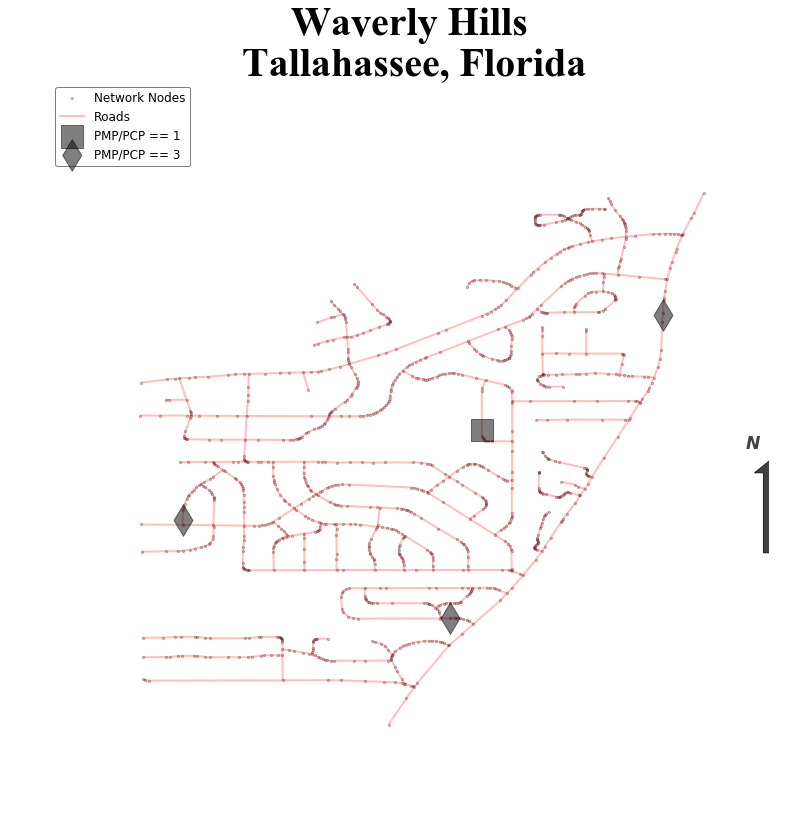

In [48]:
figsize(10,10)
# Draw Network Actual Roads and Nodes
for e in ntw.edges:
    g.add_edge(*e)
nx.draw(g, ntw.node_coords, node_size=5, alpha=0.25, edge_color='r', width=2)

size = 500
shape = 'sdh^Vp<8>'
counter = -1
for i,j in PMCP_Graphs.iteritems():
    if int(i) <= len(SER)-1:
        counter = counter+1
        pmcp = ps.open(path+'Results/Selected_Locations_PMCP'+str(i)+'.shp')
        points_pmcp = {}
        for idx, coords in enumerate(pmcp):
            PMCP_Graphs[i].add_node(idx)
            points_pmcp[idx] = coords
            PMCP_Graphs[i].node[idx] = coords
        nx.draw(PMCP_Graphs[i], 
                    points_pmcp, 
                    node_size=size,
                    node_shape=shape[counter],
                    alpha=.5, 
                    node_color='k')
    else:
        pass
    
# Legend (Ordered Dictionary)
LEGEND = OrderedDict()
LEGEND['Network Nodes']=g
LEGEND['Roads']=g
for i in PMCP_Graphs:
    if int(i) <= len(SER)-1:
        LEGEND['PMP/PCP == '+str(i)]=PMCP_Graphs[i]
legend(LEGEND, 
       loc='upper left', 
       fancybox=True, 
       framealpha=0.5, 
       scatterpoints=1)

# Title
title('Waverly Hills\n Tallahassee, Florida', family='Times New Roman', 
      size=40, color='k', backgroundcolor='w', weight='bold')

# North Arrow and 'N' --> Must be changed for different spatial resolutions, etc.
arrow(624000, 164050, 0.0, 500, width=50, head_width=125, 
          head_length=75, fc='k', ec='k',alpha=0.75,)
annotate('N', xy=(623900, 164700), fontstyle='italic', fontsize='xx-large',
            fontweight='heavy', alpha=0.75)

### Pandas PMCP Data Frame

In [49]:
qgrid.show_grid(pydf_MC, show_toolbar=True)

### Bokeh PMP & PCP [*p* vs. cost] comparision

In [50]:
#output_notebook()

TOOLS = 'wheel_zoom, pan, reset, crosshair, save, hover'

bokeh_df_PMCP = pd.DataFrame()
bokeh_df_PMCP['p'] = [int(i[2:]) for i in p_dens]
bokeh_df_PMCP['Total Obj. Value'] = [VAL_PMCP[x][0] for x in range(len(VAL_PMCP))]
bokeh_df_PMCP['Avg. Obj. Value'] = [VAL_PMCP[x][1] for x in range(len(VAL_PMCP))]
bokeh_df_PMCP['Worst Case Obj. Value'] = [VAL_PMCP[x][2] for x in range(len(VAL_PMCP))]
bokeh_df_PMCP['CentDian Obj. Value'] = [VAL_PMCP[x][3] for x in range(len(VAL_PMCP))]

plot_PMCP = figure(title="Optimal PMP & PCP Selections without Sacrifice", 
                        plot_width=800, plot_height=600, tools=[TOOLS], y_range=(0,2))

plot_PMCP.circle('x', 'y', size=5, color='red', source=source_m, legend='PMP')
plot_PMCP.line('x', 'y', 
                 color="#ff4d4d", alpha=0.2, line_width=2, source=source_m, legend='PMP')

plot_PMCP.circle('x', 'y', size=5, color='green', source=source_c, legend='PCP')
plot_PMCP.line('x', 'y', 
                 color='#00b300', alpha=0.2, line_width=2, source=source_c, legend='PCP')

plot_PMCP.circle('x', 'y', size=5, color='blue', source=source_centdian, legend='CentDian')
plot_PMCP.line('x', 'y', 
                 color='#3385ff', alpha=0.2, line_width=2, source=source_centdian, legend='CentDian')

plot_PMCP.circle_x(bokeh_df_PMCP['p'], 
                 bokeh_df_PMCP['Avg. Obj. Value'], 
                 legend="Location PMP=PCP for PM+CP", 
                 color="#ff4d4d",
                 fill_alpha=0.2,
                 size=15)

plot_PMCP.circle_x(bokeh_df_PMCP['p'], 
             bokeh_df_PMCP['Worst Case Obj. Value'], 
             legend="Location PCP=PMP for PM+CP", 
             color='#00b300',
             fill_alpha=0.2,
             size=15)

plot_PMCP.circle_x(bokeh_df_PMCP['p'], 
             bokeh_df_PMCP['CentDian Obj. Value'], 
             legend="Location CentDian = PMCP", 
             color='#3385ff',
             fill_alpha=0.2,
             size=15)

plot_PMCP.xaxis.axis_label = '[p = n]'
plot_PMCP.yaxis.axis_label = 'Miles'

one_quarter = BoxAnnotation(plot=plot_PMCP, top=.35, 
                            fill_alpha=0.1, fill_color='green')
half = BoxAnnotation(plot=plot_PMCP, bottom=.35, top=.7, 
                            fill_alpha=0.1, fill_color='blue')
three_quarter = BoxAnnotation(plot=plot_PMCP, bottom=.7, top=1.05,
                            fill_alpha=0.1, fill_color='gray')

plot_PMCP.renderers.extend([one_quarter, half, three_quarter])

show(plot_PMCP)

### Convert Service Facilities Back to Longitude/Latitude for Google Maps Plots

In [51]:
points = SERVICE
points.to_crs(epsg=32616, inplace=True) # UTM 16N
LonLat_Dict = OrderedDict()
LonLat_List = []

for i,j in points['geometry'].iteritems():
    LonLat_Dict[y_list[i]] = utm.to_latlon(j.xy[0][-1], j.xy[1][-1], 16, 'N')  
    LonLat_List.append((utm.to_latlon(j.xy[0][-1], j.xy[1][-1], 16, 'N')))

Service_Lat_List = []
Service_Lon_List = []
    
for i in LonLat_List:
    Service_Lat_List.append(i[0])
for i in LonLat_List:
    Service_Lon_List.append(i[1])

### Create Lists of Selected Locations for Google Maps Plot

In [52]:
# p-Median Selected Sites
list_of_p_MEDIAN = []
for y in range(len(y_list)):
    list_of_p_MEDIAN.append([])
    for p in range(len(p_list)):
        if pydf_M[y_list[y]][p_list[p]] == u'\u2588':
            list_of_p_MEDIAN[y].append([p_list[p]])
            
# p-Center Selected Sites
list_of_p_CENTER = []
for y in range(len(y_list)):
    list_of_p_CENTER.append([])
    for p in range(len(p_list)):
        if pydf_C[y_list[y]][p_list[p]] == u'\u2588':
            list_of_p_CENTER[y].append([p_list[p]])
            
# p-CentDian Selected Sites
list_of_p_CentDian = []
for y in range(len(y_list)):
    list_of_p_CentDian.append([])
    for p in range(len(p_list)):
        if pydf_CentDian[y_list[y]][p_list[p]] == u'\u2588':
            list_of_p_CentDian[y].append([p_list[p]])

# PMCP Selected Sites
list_of_PMCP = []
for y in range(len(y_list)):
    list_of_PMCP.append([])
    for p in p_dens:
        if pydf_MC[y_list[y]][p] == u'\u2588':
            list_of_PMCP[y].append(p)

### Google Maps Plot

In [57]:
from bokeh.io import output_notebook, output_file, show
from bokeh.models import (GMapPlot, GMapOptions, ColumnDataSource, Circle, MultiLine, 
                          DataRange1d, PanTool, WheelZoomTool, BoxSelectTool, ResetTool)

map_options = GMapOptions(lat=30.4855, lng=-84.265, map_type="hybrid", zoom=14)

plot = GMapPlot(
    x_range=DataRange1d(), y_range=DataRange1d(), map_options=map_options, title="Waverly Hills")

hover = HoverTool(tooltips="""
        <div>
            <div>
                
            </div>
            <div>
                <span style="font-size: 30px; font-weight: bold;">Site @desc</span> 
            </div>
            <div>
                <span> \b </span>
            </div>
            <div>
                <span style="font-size: 17px; font-weight: bold;">p-Median: </span> 
            </div>
                <div>
                <span style="font-size: 15px; font-weight: bold; color: #ff4d4d;">@p_select_median</span>
            </div>
            <div>
                <span> \b </span>
            </div>
            <div>
                <span style="font-size: 17px; font-weight: bold;">p-Center</span> 
            
            <div>
                <span style="font-size: 14px; font-weight: bold; color: #00b300;">@p_select_center</span>
            </div>
            <div>
                <span> \b </span>
            </div>
            <div>
                <span style="font-size: 17px; font-weight: bold;">p-CentDian</span> 
            </div>
            <div>
                <span style="font-size: 14px; font-weight: bold; color: #3385ff;">@p_select_centdian</span>
            </div>
            <div>
                <span> \b </span>
            </div>
            <span style="font-size: 17px; font-weight: bold;">PMCP Method</span> 
            </div>
            <div>
                <span style="font-size: 14px; font-weight: bold; color: 'gray';">@p_select_pmcp</span>
            </div>
        </div>""")

source_1 = ColumnDataSource(
    data=dict(
        lat=Service_Lat_List,
        lon=Service_Lon_List,
        desc=y_list,
        p_select_center=list_of_p_CENTER,
        p_select_median=list_of_p_MEDIAN,
        p_select_centdian= list_of_p_CentDian,
        p_select_pmcp=list_of_PMCP))

#source_2 = ColumnDataSource(
#    data=dict(
#        xs=line1x,
#        ys=line1y))

facilties = Circle(x="lon", y="lat", size=10, fill_color="yellow", fill_alpha=0.6, line_color=None)

#streets = MultiLine(xs="xs", ys="ys", line_width=20, line_color='red')
#plot.title = "Waverly"

plot.add_glyph(source_1, facilties)
#plot.add_glyph(source_2, streets)

plot.add_tools(PanTool(), WheelZoomTool(), BoxSelectTool(), ResetTool(), hover)
output_file("gmap_plot.html")
show(plot)

-----

# Future Work & Vision

### $\Longrightarrow$ Develop a python library for bring together in one package spatial analysis & spatial optimization [*spanoptpy*] potentially incorporating:



|QGIS|  PySAL  |  NetworkX  |  Pandas  |  GeoPandas  |  NumPy  |  Shapely  |  Bokeh | CyLP
|----|---------|-------------------------------------------------------------------------
|GIS|network analysis|network analysis|data frames|geo dataframes|scientific computing|geometric objects|visualizations|optimization

### $\Longrightarrow$ Need PySAL.Network to be able to handle larger networks

### $\Longrightarrow$ Develop functionality within a Linux environment

### $\Longrightarrow$  `scipy.spatial.cKDTree(dist_matrix)`
### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\Longrightarrow$  `query_ball_point()` for close neighbors of the selected sites

### $\Longrightarrow$ Master CyLP from COIN-OR or develop an open-source optimization suite
- interface with CLP, CBC, CGL
- [ http://mpy.github.io/CyLPdoc/ ]
- relatively steep learning curve 


- Computational Optimization Infrastructure for Operations Research
- [ http://www.coin-or.org ]

#### $\ast$ CyLP example

#### Minimize
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $ 3x + 2y $
#### Subject To
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $ x \geq 3$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $ y \geq 5$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $ x - y \leq 20$

In [54]:
# Gurobi
m = gbp.Model()
m.setParam( 'OutputFlag', False ) 
x = m.addVar(vtype=gbp.GRB.CONTINUOUS, name='x')
y = m.addVar(vtype=gbp.GRB.CONTINUOUS, name='y')
m.update()
m.setObjective(3*x + 2*y, gbp.GRB.MINIMIZE)
m.addConstr(x >= 3)
m.addConstr(y >= 5)
m.addConstr(x - y <= 20)
m.optimize()
#m.write('path_m.lp')
print m.objVal
print m.getVars()

# CyLP
s = CyClpSimplex()
x = s.addVariable('x', 1)
y = s.addVariable('y', 1)
s += x >= 3
s += y >= 5
s += x - y <= 20
s.objective = 3 * x + 2 * y
s.primal()
#s.writeLp('path_s')
print s.objectiveValue
print s.primalVariableSolution
print 'Gurobi & CLP Objective Values match? --> ', m.objVal == s.objectiveValue

19.0
[<gurobi.Var x (value 3.0)>, <gurobi.Var y (value 5.0)>]
19.0
{'y': array([ 5.]), 'x': array([ 3.])}
Gurobi & CLP Objective Values match? -->  True


/Users/jgaboardi/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:18: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/Users/jgaboardi/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:19: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/Users/jgaboardi/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:20: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/Users/jgaboardi/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:21: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/Users/jgaboardi/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:22: FutureWarning: comparison to `None` will result in an elementwise obj

-----

# email $\Longrightarrow$ jgaboardi@fsu.edu 

----

# GitHub $\Longrightarrow$ https://github.com/jGaboardi/AAG_16

In [55]:
IPd.HTML('https://github.com/jGaboardi')

### System Specs

In [56]:
import datetime as dt
import os
import platform
import sys
import bokeh
import cylp

names = ['OSX', 'Processor ', 'Machine ', 'Python ','PySAL ','Gurobi ','Pandas ','GeoPandas ',
         'Shapely ', 'NumPy ', 'Bokeh ', 'CyLP', 'Date & Time']
versions = [platform.mac_ver()[0], platform.processor(), platform.machine(), platform.python_version(),
            ps.version, gbp.gurobi.version(), pd.__version__, gpd.__version__, 
            str(shapely.__version__), np.__version__, 
            bokeh.__version__, '0.7.1', dt.datetime.now()]
specs = pd.DataFrame(index=names, columns=['Version'])
specs.columns.name = 'Platform & Software Specs'
specs['Version'] = versions
specs # Pandas DF of specifications

Platform & Software Specs,Version
OSX,10.11.3
Processor,i386
Machine,x86_64
Python,2.7.10
PySAL,1.11.0
Gurobi,"(6, 5, 0)"
Pandas,0.17.1
GeoPandas,0.1.1
Shapely,1.5.13
NumPy,1.10.4


### References

- Behnel, S., R. Bradshaw, C. Citro, L. Dalcin, D. S. Seljebotn, and K. Smith. 2011. Cython: The best of both worlds. Computing in Science and Engineering 13 (2):31–39.

- Bokeh Development Team. 2014. Bokeh: Python library for interactive visualization.

- Church, R. L. 2002. Geographical information systems and location science. Computers and Operations Research 29:541–562.

- Church, R. L., and A. T. Murray. 2009. Business Site Selections, Locational Analysis, and GIS. Hoboken, NJ, USA: John Wiley & Sons, Inc.

- Conde, E. 2008. A note on the minmax regret centdian location on trees. Operations Research Letters 36 (2):271–275.

- Current, J., M. S. Daskin, and D. A. Schilling. 2002. Discrete Network Location Models. In Facility Location Applications and Theory, eds. Z. Drezner and H. W. Hamacher, 81–118. New York: Springer Berlin Heidelberg.

- Dan Fylstra, L. Hafer, B. Hart, B. Kristjannson, C. Phillips, T. Ralphs, (Matthew Saltzman, E. Straver, (Jean-Paul Watson, and H. G. Santos. CBC. https://projects.coin-or.org/Cbc.

- Daskin, M. 2013. Network and Discrete Location: Models, Algorithms and Applications 2nd ed. Hoboken, NJ, USA: John Wiley & Sons, Inc.

- Daskin, M. S. 2008. What You Should Know About Location Modeling. Naval Research Logistics 55 (2):283–294.

- GeoPandas Developers. 2013. GeoPandas. http://geopandas.org.

- Gillies, S., A. Bierbaum, and K. Lautaportti. 2013. Shapely.

- Gurobi. 2013. Gurobi optimizer quick start guide.

- Hagberg, A. A., D. A. Schult, and P. J. Swart. 2008. Exploring network structure, dynamics, and function using NetworkX. Proceedings of the 7th Python in Science Conference (SciPy 2008) (SciPy):11–15.

- Hakimi, S. L. 1964. Optimum Locations of Switching Centers and the Absolute Centers and Medians of a Graph. Operations Research 12 (3):450–459.

- Hall, J., L. Hafer, M. Saltzman, and J. Forrest. CLP.

- Halpern, J. 1976. The Location of a Center-Median Convex Combination on an Undirected Tree. Journal of Regional Science 16 (2):237–245.

- Hamacher, H. W., and S. Nickel. 1998. Classification of location models. Location Science 6 (1-4):229–242.

- Horner, M. W., and M. J. Widener. 2010. How do socioeconomic characteristics interact with equity and efficiency considerations? An analysis of hurricane disaster relief goods provision. Geospatial Analysis and Modelling of Urban Structure and Dynamics 99:393–414.

- Horner, M. W., and M. J. Widener. 2011. The effects of transportation network failure on people’s accessibility to hurricane disaster relief goods: A modeling approach and application to a Florida case study. Natural Hazards 59:1619–1634.

- Hunter, J. D. 2007. Matplotlib: A 2D graphics environment. Computing in Science and Engineering 9 (3):99–104.

- Lima, I. 2006. Python for Scientific Computing Python Overview. Marine Chemistry :10–20.

- Lougee-Heimer, R. 2003. The Common Optimization INterface for Operations Research. IBM Journal of Research and Development 47 (1):57–66.

- Marcelin, J. M., M. W. Horner, E. E. Ozguven, and A. Kocatepe. 2016. How does accessibility to post-disaster relief compare between the aging and the general population? A spatial network optimization analysis of hurricane relief facility locations. International Journal of Disaster Risk Reduction 15:61–72.

- McKinney, W. 2010. Data Structures for Statistical Computing in Python. In Proceedings of the 9th Python in Science Conference, 51–56.

- Miller, H. J., and S.-L. Shaw. 2001. Geographic Information Systems for Transportation. New York: Oxford University Press.

- Millman, K. J., and M. Aivazis. 2011. Python for scientists and engineers. Computing in Science and Engineering 13 (2):9–12.

- Minieka, E. 1970. The m-Center Problem. SIAM Review 12:38–39.

- Owen, S. H., and M. S. Daskin. 1998. Strategic facility location: A review. European Journal of Operational Research 111 (3):423–447.

- Pérez, F., and B. E. Granger. 2007. IPython: A system for interactive scientific computing. Computing in Science and Engineering 9 (3):21–29.

- Pérez-Brito, D., J. A. Moreno-Pérez, and R.-M. Inmaculada. 1997. Finite dominating set for the p-facility cent-dian network location problem. Studies in Locational Analysis (August):1–16.

- Pérez-Brito, D., J. A. Moreno-Pérez, and I. Rodrı́guez-Martı́n. 1998. The 2-facility centdian network problem. Location Science 6 (1-4):369–381.

- QGIS Development Team. Open Source Geospatial Foundation Project. 2016. QGIS Geographic Information System.

- ReVelle, C. S., and R. W. Swain. 1970. Central facilities location. Geographical Analysis 2 (1):30–42.

- Rey, S. J., and L. Anselin. 2010. PySAL: A Python Library of Spatial Analytical Methods. In Handbook of Applied Spatial Analysis, eds. M. M. Fischer and A. Getis, 175–193. Springer Berlin Heidelberg.

- Shier, D. R. 1977. A Min–Max Theorem for p-Center Problems on a Tree. Transportation Science 11:243–52.

- Suzuki, A., and Z. Drezner. 1996. The p-center location problem in an area. Location Science 4 (1-2):69–82.

- Tamir, A., J. Puerto, and D. Pérez-Brito. 2002. The centdian subtree on tree networks. Discrete Applied Mathematics 118 (3):263–278.

- Teitz, M. B., and P. Bart. 1968. Heuristic Methods for Estimating the Generalized Vertex Median of a Weighted Graph. Operations Research 16 (5):955–961.

- Tong, D., and A. T. Murray. 2012. Spatial Optimization in Geography. Annals of the Association of American Geographers 102 (6):1290–1309.

- Towhidi, M., and D. Orban. 2011. CyLP.

- US Census Bureau. 2015. TIGER/Line® Shapefiles and TIGER/Line® Files. U.S. Census Bureau Geography. https://www.census.gov/geo/maps-data/data/tiger-line.html.

- Walt, S. van der, S. C. Colbert, and G. Varoquaux. 2011. The NumPy Array: A Struture for Efficient Numerical Computation. Computing in Science & Engeneering 13:22–30.

- William, R. 1971. The M-center problem.

------------------